<figure>
  <IMG SRC="Logo.png"  WIDTH=150 ALIGN="right">
</figure>

## Projections of mean sea level and tides<br>
### Six Dutch stations
<b>Prepared by: H.G. Voortman</b>


<figure>
    <IMG SRC="https://www.python.org/static/community_logos/python-powered-w-200x80.png"  WIDTH=100 ALIGN="right">
</figure>

#### Description
- Showing examples of effects in the North Sea

#### References
- Provided in report

#### Packages

In [1]:
# General packages
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sq
import numpy as np
import scipy.signal as signal
import datetime as dt

In [2]:
# Settings
plt.rcParams['axes.grid'] = True

#### Connect databases and import data

##### Processed data Rijkswaterstaat

In [3]:
# Connect database
conn_str = os.getenv('DATAPATH') + 'RWS_processed.db'
cnxn = sq.connect(conn_str, detect_types = True)

In [4]:
pd.read_sql('SELECT * FROM sqlite_master', cnxn)

,type,name,tbl_name,rootpage,sql
0,table,const_yr,const_yr,2,"CREATE TABLE ""const_yr"" (\n""tijd"" TIMESTAMP,\n..."
1,table,timeseries,timeseries,3,"CREATE TABLE ""timeseries"" (\n""index"" INTEGER,\..."
2,table,const_mnth,const_mnth,4,"CREATE TABLE ""const_mnth"" (\n""tijd"" TIMESTAMP,..."
3,index,ix_const_yr_tijd_naam_level_2,const_yr,5,"CREATE INDEX ""ix_const_yr_tijd_naam_level_2""ON..."
4,index,ix_timeseries_index,timeseries,6,"CREATE INDEX ""ix_timeseries_index""ON ""timeseri..."
5,index,ix_const_mnth_tijd_naam_level_2,const_mnth,7,"CREATE INDEX ""ix_const_mnth_tijd_naam_level_2""..."


In [5]:
sql = "PRAGMA table_info(const_yr)"
pd.read_sql(sql, cnxn)

,cid,name,type,notnull,dflt_value,pk
0,0,tijd,TIMESTAMP,0,None,0
1,1,naam,TEXT,0,None,0
2,2,level_2,INTEGER,0,None,0
3,3,z0,REAL,0,None,0
4,4,M2_ampl,REAL,0,None,0
5,5,S2_ampl,REAL,0,None,0
6,6,N2_ampl,REAL,0,None,0
7,7,K2_ampl,REAL,0,None,0
8,8,O1_ampl,REAL,0,None,0
9,9,K1_ampl,REAL,0,None,0


In [6]:
# Read table with observed water levels; complete years only
sql = (
    "SELECT naam, tijd, z0, zmean, "
    "M2_ampl as M2, S2_ampl as S2, N2_ampl as N2, "
    "K2_ampl as K2, O1_ampl as O1, K1_ampl as K1, "
    "count "
    "FROM const_yr "
    "WHERE naam IN ('Delfzijl', 'Harlingen', "
    "'Den Helder', 'IJmuiden',  "
    "'Hoek van Holland', 'Vlissingen') "
    "AND count > 1500"
)
df = pd.read_sql(sql, cnxn) #.groupby('YEAR').mean()

In [7]:
cnxn.close()

In [8]:
df[df['naam']=='Hoek van Holland'].head()

,naam,tijd,z0,zmean,M2,S2,N2,K2,O1,K1,count
10,Hoek van Holland,1888-12-31,-0.090969,-0.293235,0.879880,0.124461,0.040330,0.034860,0.071859,0.046783,2102
12,Hoek van Holland,1889-12-31,-0.086394,-0.278122,0.875657,0.126631,0.034735,0.026841,0.079483,0.059654,2119
29,Hoek van Holland,1904-12-31,-0.008897,-0.181734,0.862259,0.122072,0.041885,0.014531,0.060922,0.053906,2053
31,Hoek van Holland,1905-12-31,-0.028478,-0.184613,0.879312,0.133461,0.054348,0.014388,0.064850,0.046091,2014
33,Hoek van Holland,1906-12-31,-0.091924,-0.139858,0.812384,0.152534,0.077489,0.034623,0.087836,0.059448,4849


In [9]:
df = df[np.abs(df['z0']) < 1e2]
df = df[np.abs(df['M2']) < 1e2]
df = df[df['tijd'].dt.year < 2022]

In [10]:
df['year'] = df['tijd'].dt.year

In [11]:
names = [
    'Delfzijl',
    'Harlingen',
    'Den Helder',
    'IJmuiden',
    'Hoek van Holland',
    'Vlissingen'
]

In [12]:
df

,naam,tijd,z0,zmean,M2,S2,N2,K2,O1,K1,count,year
0,Delfzijl,1879-12-31,-0.220065,-0.205129,1.354003,0.305145,0.175963,0.107127,0.079349,0.066612,4184,1879
1,Delfzijl,1880-12-31,-0.187855,-0.151690,1.353419,0.310655,0.156497,0.097342,0.074183,0.062072,4236,1880
2,Delfzijl,1881-12-31,-0.218020,-0.200764,1.365389,0.273756,0.167883,0.082479,0.079238,0.064730,4164,1881
3,Delfzijl,1882-12-31,-0.201777,-0.172632,1.404464,0.317662,0.203334,0.079700,0.077660,0.059879,4285,1882
4,Delfzijl,1883-12-31,-0.246079,-0.219698,1.416223,0.289511,0.187911,0.067516,0.058466,0.061654,4274,1883
...,...,...,...,...,...,...,...,...,...,...,...,...
614,Den Helder,2021-12-31,0.042042,0.053026,0.638154,0.178123,0.090676,0.052953,0.103651,0.073795,12582,2021
615,Harlingen,2021-12-31,0.113365,0.125824,0.826433,0.205744,0.124050,0.073690,0.099474,0.076830,12583,2021
616,Hoek van Holland,2021-12-31,0.133618,0.142189,0.790356,0.196940,0.105245,0.058454,0.109947,0.075661,12583,2021
617,IJmuiden,2021-12-31,0.056868,0.064466,0.662545,0.172055,0.084780,0.047993,0.116028,0.081654,12579,2021


##### Data PSMSL

In [13]:
# Connect database
conn_str = os.getenv('DATAPATH') + 'PSMSL.db'
cnxn = sq.connect(conn_str, detect_types = True)

In [14]:
pd.read_sql('SELECT * FROM sqlite_master', cnxn)

,type,name,tbl_name,rootpage,sql
0,table,data,data,2,"CREATE TABLE ""data"" (\n""time"" INTEGER,\n ""lev..."
1,table,log,log,586,"CREATE TABLE ""log"" (\n""name"" TEXT,\n ""downloa..."


In [15]:
sql = "PRAGMA table_info('data')"
pd.read_sql(sql, cnxn)

,cid,name,type,notnull,dflt_value,pk
0,0,time,INTEGER,0,None,0
1,1,level,REAL,0,None,0
2,2,id,INTEGER,0,None,0
3,3,name,TEXT,0,None,0
4,4,type,TEXT,0,None,0
5,5,freq,TEXT,0,None,0


In [16]:
sql = "SELECT DISTINCT(type) FROM data"
pd.read_sql(sql, cnxn)

,type
0,rlr
1,met


In [17]:
# Read table with observed water levels; complete years only
sql = (
    "SELECT name, time, level, type, freq FROM data "
    "WHERE freq = 'annual' "
    "AND name IN ('DELFZIJL', 'HARLINGEN', "
    "'DEN HELDER', 'IJMUIDEN',  "
    "'HOEK VAN HOLLAND', 'VLISSINGEN') "
    "AND type = 'rlr'"

)
psmsl = pd.read_sql(sql, cnxn) #.groupby('YEAR').mean()

In [18]:
psmsl['name'].unique()

array(['VLISSINGEN', 'HOEK VAN HOLLAND', 'DEN HELDER', 'DELFZIJL',
       'HARLINGEN', 'IJMUIDEN'], dtype=object)

In [19]:
df = df[np.abs(df['z0']) < 1e2]
df = df[np.abs(df['M2']) < 1e2]
df = df[df['tijd'].dt.year < 2022]

In [20]:
df['year'] = df['tijd'].dt.year + (df['tijd'].dt.month - 0.5)/12

#### Mean sea level

In [21]:
psmsl['level'] = psmsl['level']/1000

In [22]:
psmsl['name'].unique()

array(['VLISSINGEN', 'HOEK VAN HOLLAND', 'DEN HELDER', 'DELFZIJL',
       'HARLINGEN', 'IJMUIDEN'], dtype=object)

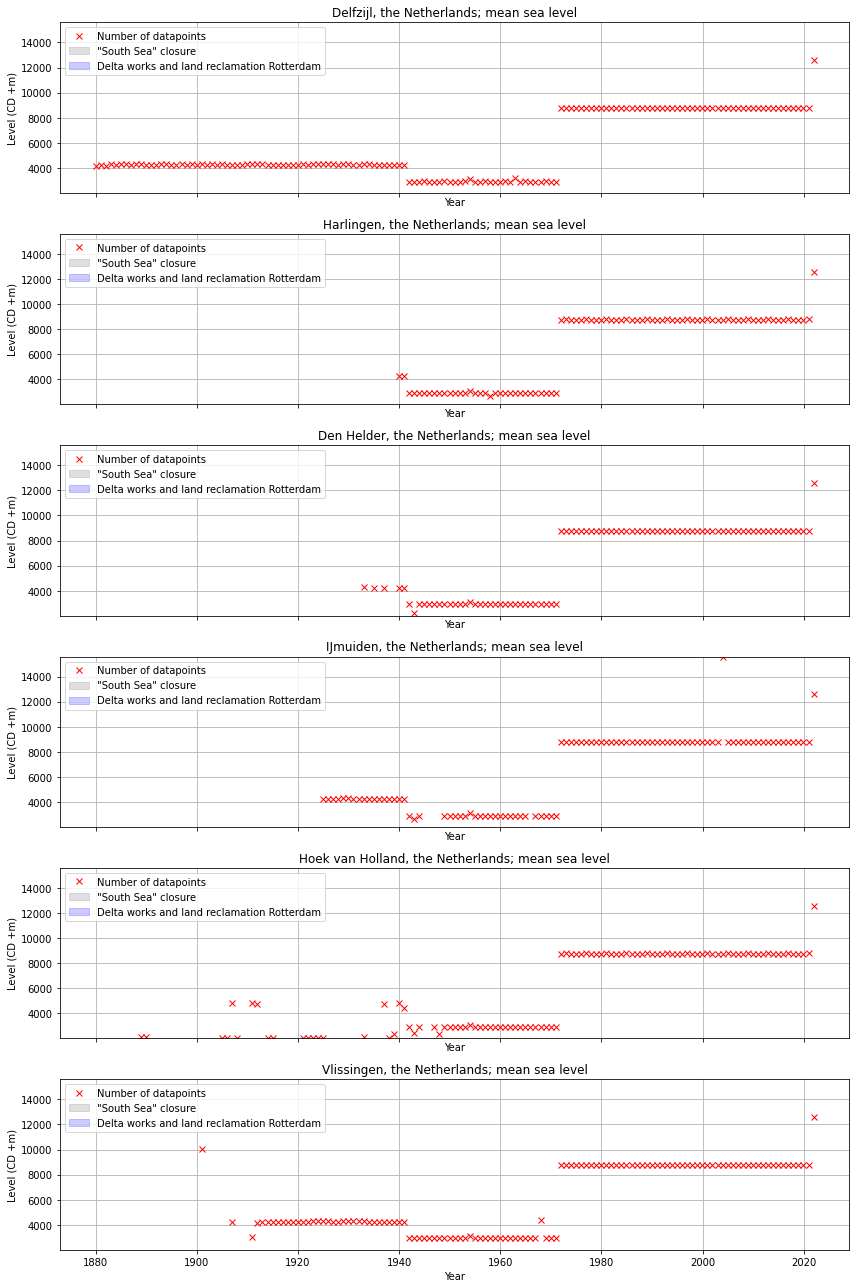

In [23]:
fig, ax = plt.subplots(nrows = 6, ncols = 1, sharex = True, sharey = True, figsize = (12, 18))
for i, nm in enumerate(names):
    data = df[df['naam'] == nm]
    ax[i].plot(
        data['year'], data['count'], 'rx',
        label = 'Number of datapoints'
    )

    ax[i].set_ylabel('Level (CD +m)')
    ax[i].set_xlabel('Year')
    ax[i].fill_betweenx(
        y = [-5, 5], x1 = 1923, x2 = 1932,
        color = 'gray', alpha = 0.25, label = '"South Sea" closure')
    ax[i].fill_betweenx(
        y = [-5, 5], x1 = 1954, x2 = 1985,
        color = 'blue', alpha = 0.2, label = 'Delta works and land reclamation Rotterdam')
    ax[i].legend()
    ax[i].title.set_text(nm + ", the Netherlands; mean sea level")
    ax[i].set_ylim(df['count'].min(), df['count'].max())
    #plt.xlim([1953, 1953.5])
plt.tight_layout()
plt.savefig('../pics/MSL_all.jpg');

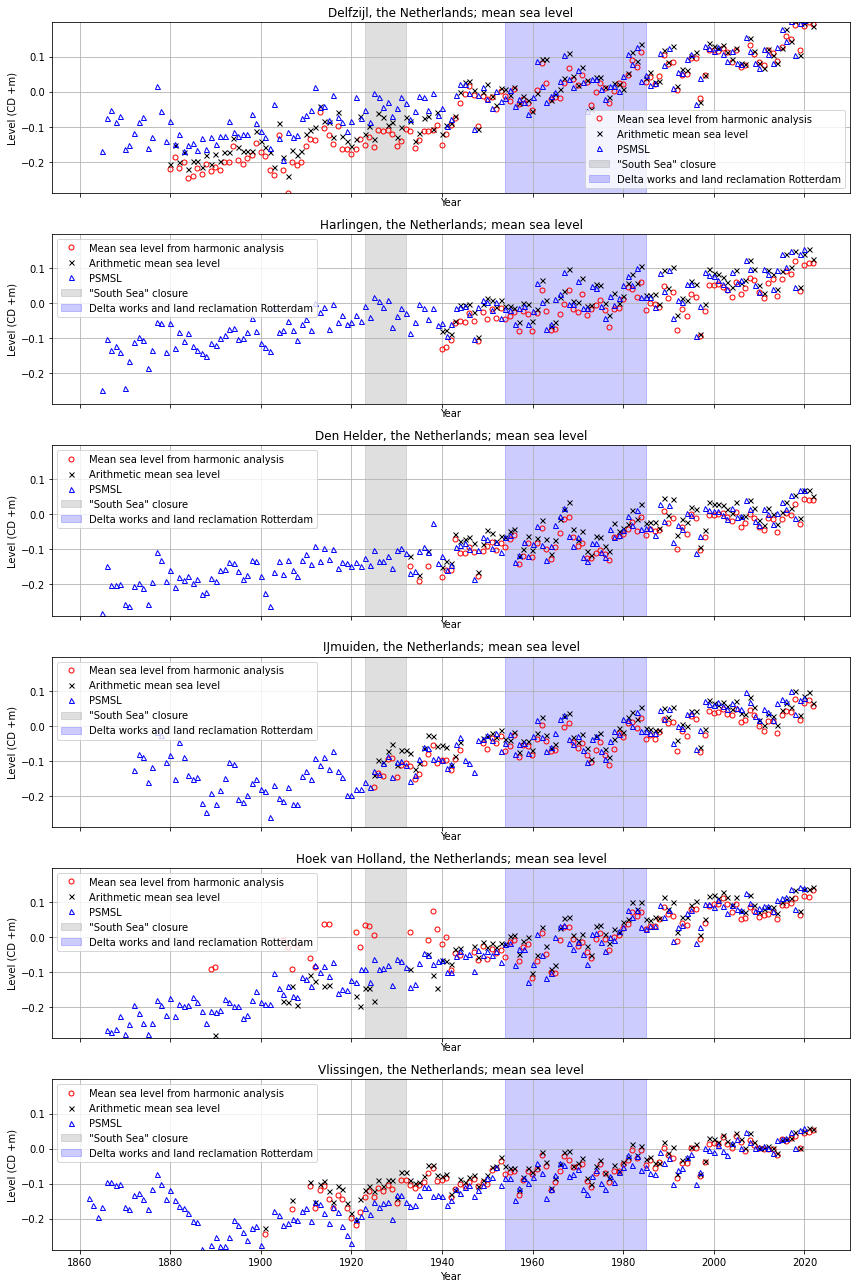

In [24]:
fig, ax = plt.subplots(nrows = 6, ncols = 1, sharex = True, sharey = True, figsize = (12, 18))
for i, nm in enumerate(names):
    data = df[df['naam'] == nm]
    ax[i].plot(
        data['year'], data['z0'], 'ro', 
        label = 'Mean sea level from harmonic analysis', 
        markersize = 5, mfc = 'none')
    ax[i].plot(
        data['year'], data['zmean'], 'kx', 
        label = 'Arithmetic mean sea level', 
        markersize = 5, mfc = 'none')

    mn = data['zmean'].max()
    data = psmsl[psmsl['name'] == nm.upper()]
    
    mn2 = data['level'].max()
    delta = mn2 - mn

    ax[i].plot(
        data['time'], data['level'] - delta, 'b^', 
        label = 'PSMSL', 
        markersize = 5, mfc = 'none')
    ax[i].set_ylabel('Level (CD +m)')
    ax[i].set_xlabel('Year')
    ax[i].fill_betweenx(
        y = [-5, 5], x1 = 1923, x2 = 1932,
        color = 'gray', alpha = 0.25, label = '"South Sea" closure')
    ax[i].fill_betweenx(
        y = [-5, 5], x1 = 1954, x2 = 1985,
        color = 'blue', alpha = 0.2, label = 'Delta works and land reclamation Rotterdam')
    ax[i].legend()
    ax[i].title.set_text(nm + ", the Netherlands; mean sea level")
    ax[i].set_ylim(df['z0'].min(), df['z0'].max())
    #plt.xlim([1953, 1953.5])
plt.tight_layout()
plt.savefig('../pics/MSL_all.jpg');

#### Tides

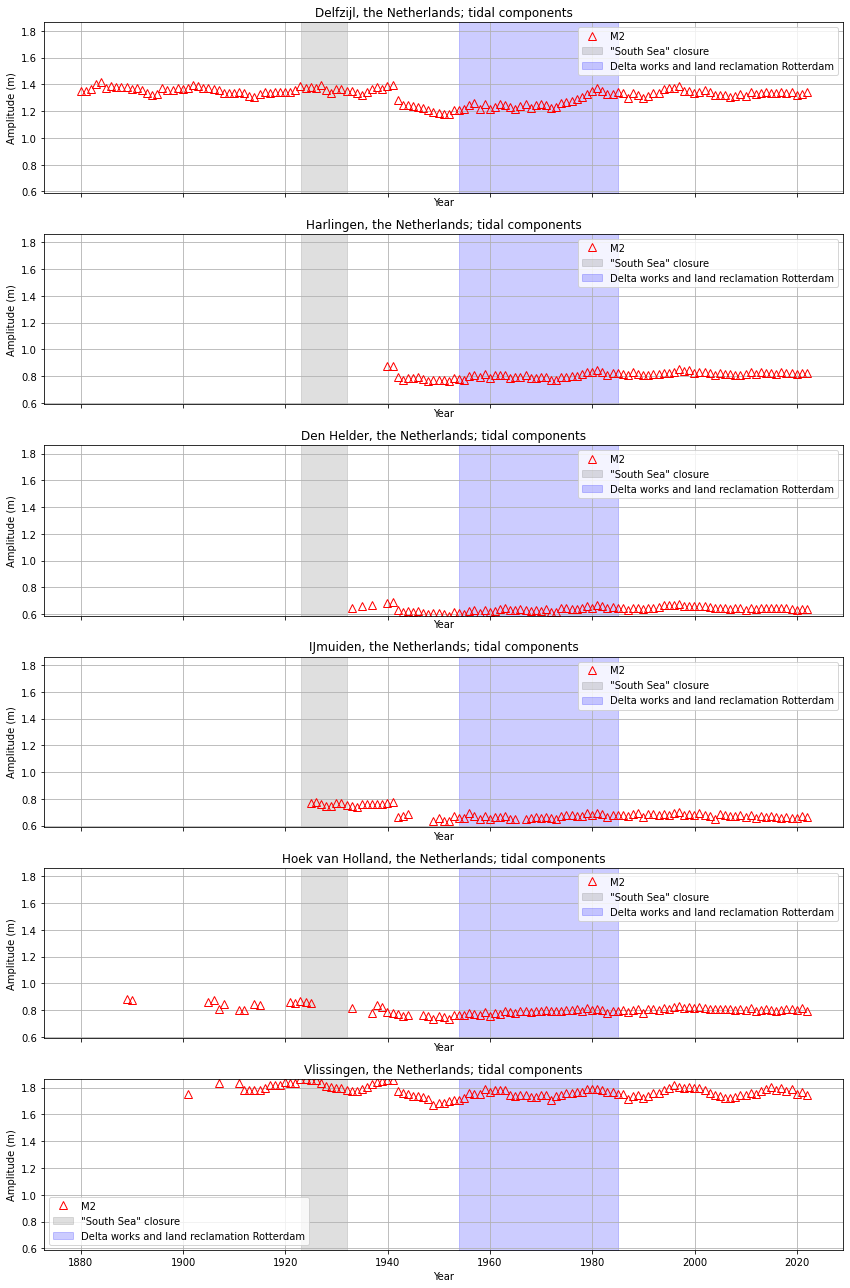

In [25]:
fig, ax = plt.subplots(nrows = 6, ncols = 1, sharex = True, sharey = True, figsize = (12, 18))
for i, nm in enumerate(names):
    data = df[df['naam'] == nm]
    ax[i].plot(
        data['year'], data['M2'], 'r^', 
        label = 'M2', 
        markersize = 8, mfc = 'none')
    """
    ax[i].plot(
        data['year'], data['S2'], 'rs', 
        label = 'S2', 
        markersize = 8, mfc = 'none')
        """
    ax[i].set_ylabel('Amplitude (m)')
    ax[i].set_xlabel('Year')
    ax[i].fill_betweenx(
        y = [0, 3], x1 = 1923, x2 = 1932,
        color = 'gray', alpha = 0.25, label = '"South Sea" closure')
    ax[i].fill_betweenx(
        y = [0, 3], x1 = 1954, x2 = 1985,
        color = 'blue', alpha = 0.2, label = 'Delta works and land reclamation Rotterdam')
    ax[i].legend()
    ax[i].title.set_text(nm + ", the Netherlands; tidal components")
    ax[i].set_ylim(df['M2'].min(), df['M2'].max())
plt.tight_layout()
plt.savefig('../pics/M2_all.jpg');

#### End script
Prepared by HVEC lab, 2022